# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [10]:
# Obtendo a média e diferença

matrix = df.values
mean = np.dot(matrix, np.array([0.5, 0.5]))
diff = np.dot(matrix, np.array([0.5, -0.5]))

df['mean'] = mean
df['diff'] = diff

df.head(3)

,p1,p2,mean,diff
0,6.964692,7.943428,7.454060,-0.489368
1,2.861393,5.099537,3.980465,-1.119072
2,2.268515,0.974429,1.621472,0.647043


In [13]:
# Calculando a correlação entre os dados de p1 e p2

corr = df['p1'].corr(df['p2'])
corr

# Conclui-se que p1 e p2 tem uma correlação positiva alta, mas com um certo grau de ruido.

0.8957365818728046

In [12]:
# Calculando a correlação entre os dados transformados

corr = df['mean'].corr(df['diff'])
corr

# Conclui-se que as transformações feitas resultam em variáveis sem correlação alguma, pois ela é negativa

-0.13347385411788837

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [16]:
sum = np.dot(matrix, np.array([1, 1]))
df['sum'] = sum

In [18]:
corr_sum_diff = df['sum'].corr(df['diff'])
corr_sum_diff

-0.13347385411788837

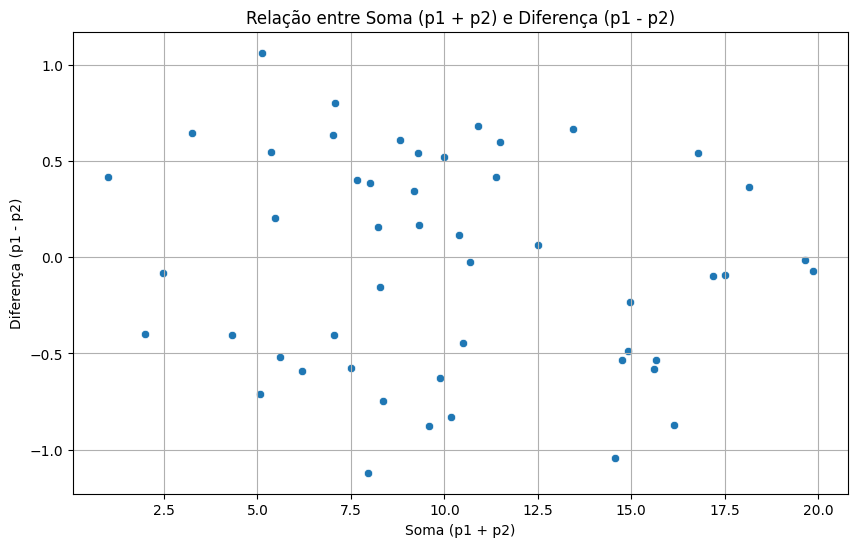

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sum', y='diff', data=df)
plt.title('Relação entre Soma (p1 + p2) e Diferença (p1 - p2)')
plt.xlabel('Soma (p1 + p2)')
plt.ylabel('Diferença (p1 - p2)')
plt.grid(True)
plt.show()